# 岭回归（2范数）

In [2]:
from sklearn.linear_model import Ridge,LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import numpy as np

In [3]:
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m,1)
y = 1 + 0.5 * x + np.random.randn(m,1) / 1.5
x_new = np.linspace(0,3,100).reshape(100,1)

In [4]:
def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_class(alpha,model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                                ('scaler',StandardScaler()),
                                ('regul_reg',model)])
        model.fit(x,y)
        y_new_pred = model.predict(x_new)
        plt.plot(x_new,y_new_pred,style,linewidth=2,label=r'$\alpha={}$'.format(alpha))
    plt.plot(x,y,'b.')
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('$x_1$',fontsize=18)
    plt.axis([0,3,0,4])

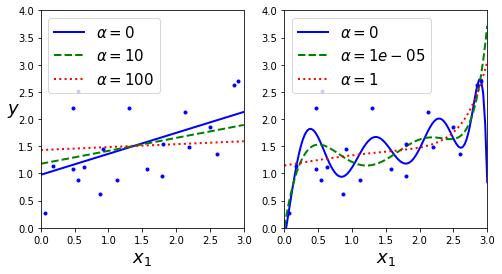

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.show()

# 套索回归（1范数）

In [6]:
from sklearn.linear_model import Lasso

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


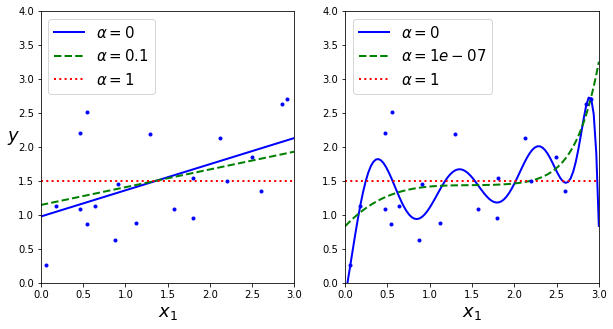

In [14]:
plt.figure(figsize = (10,5))
plt.axis([0,3,0,4])
plt.subplot(121)
plt.ylabel('$y$',fontsize=18,rotation=0)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),tol = 1,random_state=42)
plt.show()

# 弹性网络

In [20]:
from sklearn.linear_model import ElasticNet

In [23]:
elasticnet_cfg = ElasticNet(alpha=0.1,l1_ratio = 0.5)
elasticnet_cfg.fit(x,y)
y_new_pred = elasticnet_cfg.predict(x_new)

那么到底如何选择线性回归，岭回归，Lasso回归He弹性网络呢？通常来说，有正则化---哪怕是很小，是比没有更可取一些，多以大多数情况下，应该避免使用
纯线性回归，岭回归是个不错的默认选择，但是如果觉得实际用到的特征只是少数几个，那就应该更倾向与Lasso回归或弹性网络，因为他们会将无用特征的权重
降低为0，一般而言，弹性网络优于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso回归的表现可能非常不稳定